In [1]:
from pylab import *

SIR epidemics model
\begin{align}
\dot{S}&=-\beta \frac{SI}{N}\\
\dot{I}&=\hphantom{-}\beta \frac{SI}{N} - \gamma I\\
\dot{R}&=\hphantom{-}\gamma I
\end{align}
Where 
$S$: number of susceptible; 
$I$: number of infected; 
$R$: number of recovered; 
$N=S+I+R$; 
$\beta$: number of contacts per person per time; 
$\gamma^{-1}$: average days to recovery.

Make non-dimensional by using $\gamma^{-1}$ as the unit of time, and $N$ as the unit of population. Omitting to mark the non-dimensional variables in a different way as the dimensional ones, one finds:
\begin{align}
\dot{S}&=-R_0 SI\\
\dot{I}&=\hphantom{-}R_0 SI -I\\
\dot{R}&=\hphantom{-}I
\end{align}
Where $R_0=\beta/\gamma$, and $S,I,R$ are now fractions of the total population, with $S+R+I=1$
The obvious fixed point of this system is $P=(1,0,0)$ corresponding to a fully healthy (and fully susceptible) population. It's easy to verify that the Jacobian matrix evaluated at this fixed point has eigenvalues
\begin{equation}
\lambda_1=\lambda_2=0;\quad\lambda_3=R_0-1
\end{equation}
Thus upon turning an infinitesimally small number of susceptibles into infected, the infected initially grow (or decays) proportionally to $e^{(R_0-1)t}$

This system, however, is highly degenerate. It's immediate to see that any state with $I=0$ is a fixed point. The state $(1-p, 0, p)$ has the eigenvalues:
\begin{equation}
\lambda_1=\lambda_2=0;\quad\lambda_3=R_0(1-p)-1
\end{equation}
Fixed points with a sufficietly high fraction $p$ of recovered cases (and a correspondingly diminished fraction $(1-p)$ of susceptibles) are stable. Furthermore, one may observe that the rate of changes of the infected may be written as
\begin{equation}
\dot{I}=(R_0S-1)I
\end{equation}
Thus, when during the course of an epidemics it becomes $R_0S<1$ then the epidemics wanes and eventually stops.
So, one may define a new number $R_t$ as 
\begin{equation}
R_t=R_0S(t)
\end{equation}
(which is what the media wrongly refer to $R_0$, when they say "$R_0$ is decreasing"). In the SIR model, the criterion $R_t<1$ identifies when the worst is over...

In [2]:
class SIR:
    def __init__(self, R0):
        self.R0 = R0
    def rhs(self, state):
        S, I, R = state
        return array([-self.R0*S*I, self.R0*S*I-I, I])

In [3]:
def RK2(state, rhs, dt):
    midstep = state + rhs(state)*dt/2
    newstate = state + rhs(midstep)*dt
    return newstate

In [4]:
R0 = 4
dt = 0.01
Nloops = 1000
V = SIR(R0)
Inicond = array([0.999, 0.001, 0])
states = [Inicond]

In [5]:
for loop in range(Nloops):
    states.append(RK2(states[-1], V.rhs, dt))

In [6]:
states = array(states)

In [7]:
states.shape

(1001, 3)

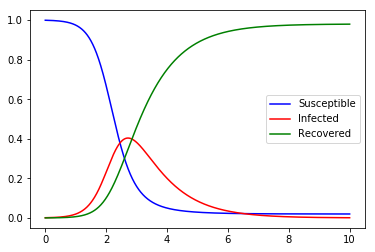

In [8]:
plot(arange(Nloops+1)*dt, states[:,0], 'b-')
plot(arange(Nloops+1)*dt, states[:,1], 'r-')
plot(arange(Nloops+1)*dt, states[:,2], 'g-')
legend(["Susceptible", "Infected", "Recovered"])

Sanity check: the number $S+I+R$ must remain constant and equal to 1

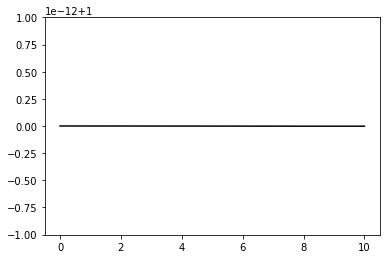

In [9]:
plot(arange(Nloops+1)*dt, states[:,0]+states[:,1]+states[:,2], 'k-')

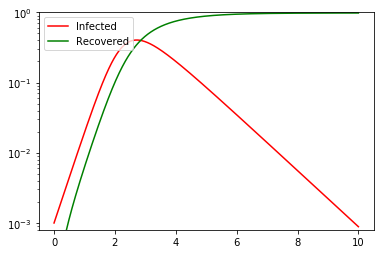

In [10]:
semilogy(arange(Nloops+1)*dt, states[:,1], 'r-')
semilogy(arange(Nloops+1)*dt, states[:,2], 'g-')
ylim(8.e-4, 1)
legend(["Infected", "Recovered"], loc="upper left")